In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import geopandas as gpd
from prettytable import PrettyTable

### Web Scraping

In [78]:
url = 'https://www.mohfw.gov.in/'

# make a GET request to fectch the raw HTML content
web_content = requests.get(url).content

# parse the html content
soup = BeautifulSoup(web_content, "html.parser")

# remove any newlines and extra spaces from left and right
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]

# find all table rows and data cells within
stats = []
all_rows = soup.find_all("tr")

for row in all_rows:
    stat = extract_contents(row.find_all('td'))
    
    if len(stat) == 5:
        stats.append(stat)
        
# Now convert the data into a pandas dataframe for further processing

new_cols = ["Sr. No", "States", "Confirmed", "Recovered", "Deceased/Deaths"]
state_data = pd.DataFrame(stats, columns = new_cols)
state_data.info()
# Right now the data columns are in String format
# we have to covert columns("Confirmed", "Recovered", "Deaths") them  to int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sr. No           32 non-null     object
 1   States           32 non-null     object
 2   Confirmed        32 non-null     object
 3   Recovered        32 non-null     object
 4   Deceased/Deaths  32 non-null     object
dtypes: object(5)
memory usage: 704.0+ bytes


In [79]:
# So lets covert them
state_data['Confirmed'] = state_data['Confirmed'].map(int)
state_data['Recovered'] = state_data['Recovered'].map(int)
state_data['Deceased/Deaths'] = state_data['Deceased/Deaths'].map(int)
state_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sr. No           32 non-null     object
 1   States           32 non-null     object
 2   Confirmed        32 non-null     int64 
 3   Recovered        32 non-null     int64 
 4   Deceased/Deaths  32 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ KB


In [80]:
# Now let's check the data...
sorted_state_data = state_data.sort_values(by='Confirmed', ascending=False)
sorted_state_data


,Sr. No,States,Confirmed,Recovered,Deceased/Deaths
18,19,Maharashtra,5652,789,269
9,10,Gujarat,2407,179,103
7,8,Delhi,2248,724,48
25,26,Rajasthan,1890,230,27
17,18,Madhya Pradesh,1695,148,81
26,27,Tamil Nadu,1629,662,18
30,31,Uttar Pradesh,1509,187,21
27,28,Telengana,960,197,24
1,2,Andhra Pradesh,895,141,27
31,32,West Bengal,456,79,15


In [82]:
# Represent the data with PrettyTable
table = PrettyTable()
table.field_names = (new_cols)

for i in stats:
    table.add_row(i)

table.add_row(["", "Total", 
               sum(state_data["Confirmed"]),
              sum(state_data["Recovered"]),
              sum(state_data["Deceased/Deaths"])])

# table.set_style(MSWORD_FRIENDLY)
print(table)

+--------+-----------------------------+-----------+-----------+-----------------+
| Sr. No |            States           | Confirmed | Recovered | Deceased/Deaths |
+--------+-----------------------------+-----------+-----------+-----------------+
|   1    | Andaman and Nicobar Islands |     18    |     11    |        0        |
|   2    |        Andhra Pradesh       |    895    |    141    |        27       |
|   3    |      Arunachal Pradesh      |     1     |     1     |        0        |
|   4    |            Assam            |     35    |     19    |        1        |
|   5    |            Bihar            |    148    |     46    |        2        |
|   6    |          Chandigarh         |     27    |     14    |        0        |
|   7    |         Chhattisgarh        |     36    |     28    |        0        |
|   8    |            Delhi            |    2248   |    724    |        48       |
|   9    |             Goa             |     7     |     7     |        0        |
|   

#### Ploting Data on Bar Graph of Matplotlib

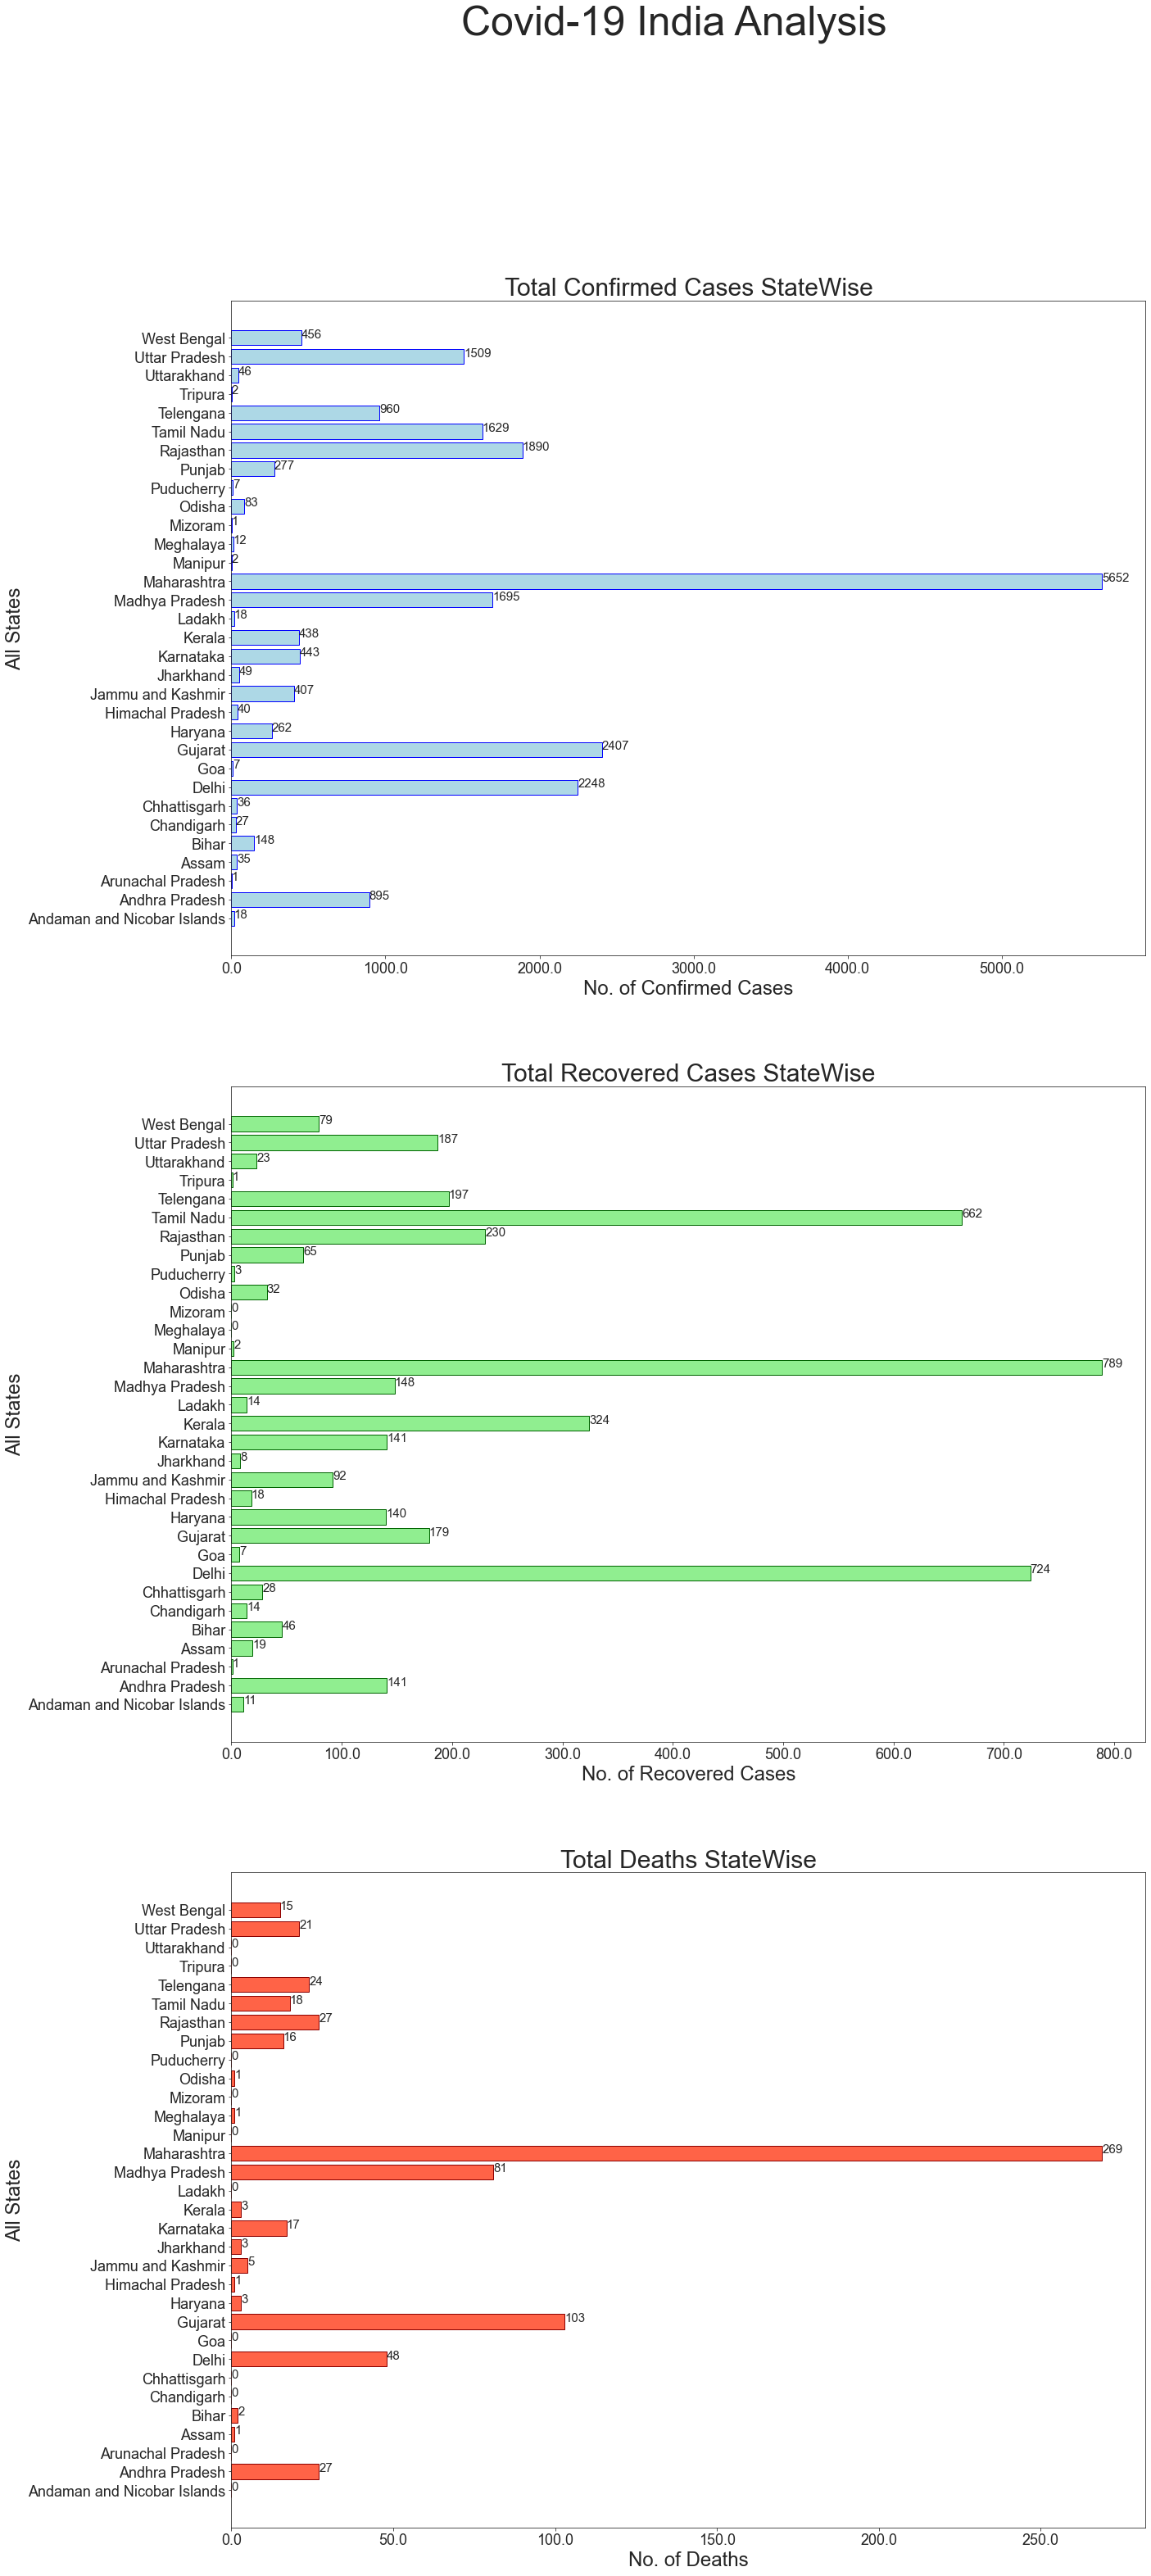

In [89]:
sns.set_style("ticks")
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3,
                                   ncols=1,
                                   figsize=(20, 50))

fig.suptitle("Covid-19 India Analysis", fontsize=50)


# Setting ax0 for Confirmed Cases....
ax0.barh(state_data["States"],
        state_data["Confirmed"],
        align = 'center',
        color = 'lightblue', 
        edgecolor = 'blue')

ax0.set_xlabel("No. of Confirmed Cases", fontsize=24)
ax0.set_ylabel("All States", fontsize=24)

xticks = ax0.get_xticks()
ax0.set_xticklabels(xticks, fontsize=18)
ax0.set_yticklabels(state_data["States"], fontsize=18)
# ax0.set_yticks(fontsize=15)
ax0.set_title('Total Confirmed Cases StateWise', fontsize=30)

for index, value in enumerate(state_data["Confirmed"]):
    ax0.text(value, index, str(value), fontsize=15)
    

# Setting ax1 for Recovered Cases.....
ax1.barh(state_data["States"],
        state_data["Recovered"],
        align = 'center',
        color = 'lightgreen', 
        edgecolor = 'darkgreen')

ax1.set_xlabel("No. of Recovered Cases", fontsize=24)
ax1.set_ylabel("All States", fontsize=24)

xticks = ax1.get_xticks()
ax1.set_xticklabels(xticks, fontsize=18)
ax1.set_yticklabels(state_data["States"], fontsize=18)
# ax0.set_yticks(fontsize=15)
ax1.set_title('Total Recovered Cases StateWise', fontsize=30)

for index, value in enumerate(state_data["Recovered"]):
    ax1.text(value, index, str(value), fontsize=15)


# Setting ax2 for Recovered Cases.....
ax2.barh(state_data["States"],
        state_data["Deceased/Deaths"],
        align = 'center',
        color = 'tomato', 
        edgecolor = 'darkred')

ax2.set_xlabel("No. of Deaths", fontsize=24)
ax2.set_ylabel("All States", fontsize=24)

xticks = ax2.get_xticks()
ax2.set_xticklabels(xticks, fontsize=18)
ax2.set_yticklabels(state_data["States"], fontsize=18)
# ax0.set_yticks(fontsize=15)
ax2.set_title('Total Deaths StateWise', fontsize=30)

for index, value in enumerate(state_data["Deceased/Deaths"]):
    ax2.text(value, index, str(value), fontsize=15)
    
fig.savefig("Covid-19_analysis_india.png")

#### Donut Chart - Total Cases

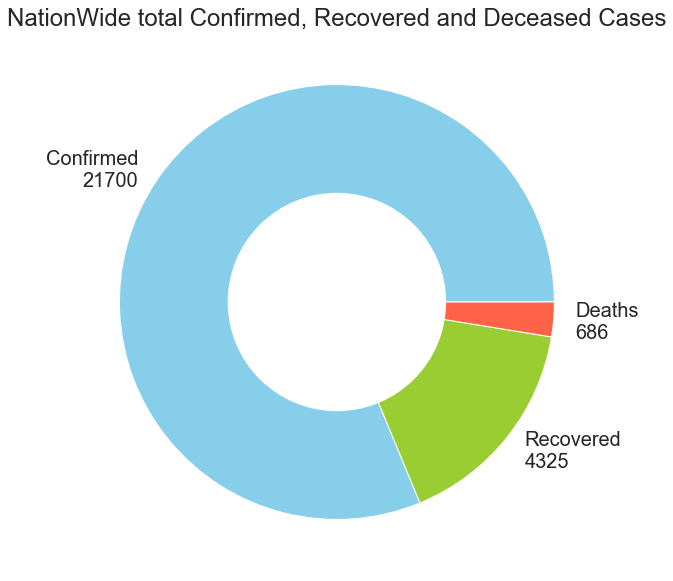

In [96]:
group_size = [
    sum(state_data['Confirmed']),
    sum(state_data['Recovered']),
    sum(state_data['Deceased/Deaths'])
]

group_labels = [
    'Confirmed\n' + str(sum(state_data['Confirmed'])),
    'Recovered\n' + str(sum(state_data['Recovered'])),
    'Deaths\n' + str(sum(state_data['Deceased/Deaths']))
]

colors = [
    'skyblue',
    'yellowgreen',
    'tomato'
]

plt.figure(figsize=(10,10))
plt.pie(group_size, labels = group_labels, colors= colors)
central_circle = plt.Circle((0,0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=20)
plt.title('NationWide total Confirmed, Recovered and Deceased Cases', fontsize=24)
plt.show()
fig.savefig("total_cases.png")

#### Chloropleth map of the total Confirmed Cases

In [99]:
# reading the shape file of map of India in GeoDataFrame

map_data = gpd.read_file('map/Indian_States.shp')
map_data.rename(columns = {'st_nm': 'States'}, inplace=True)
map_data.head()

,States,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [103]:
# merge two dataframe

merged_data = pd.merge(map_data, state_data, how='left', on = 'States')
merged_data.fillna(0, inplace=True)
merged_data.drop('Sr. No', axis=1, inplace=True)
merged_data.head()

,States,geometry,Confirmed,Recovered,Deceased/Deaths
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",0.0,0.0,0.0
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",0.0,0.0,0.0
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",35.0,19.0,1.0
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",148.0,46.0,2.0
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",27.0,14.0,0.0


#### Plotting On Map

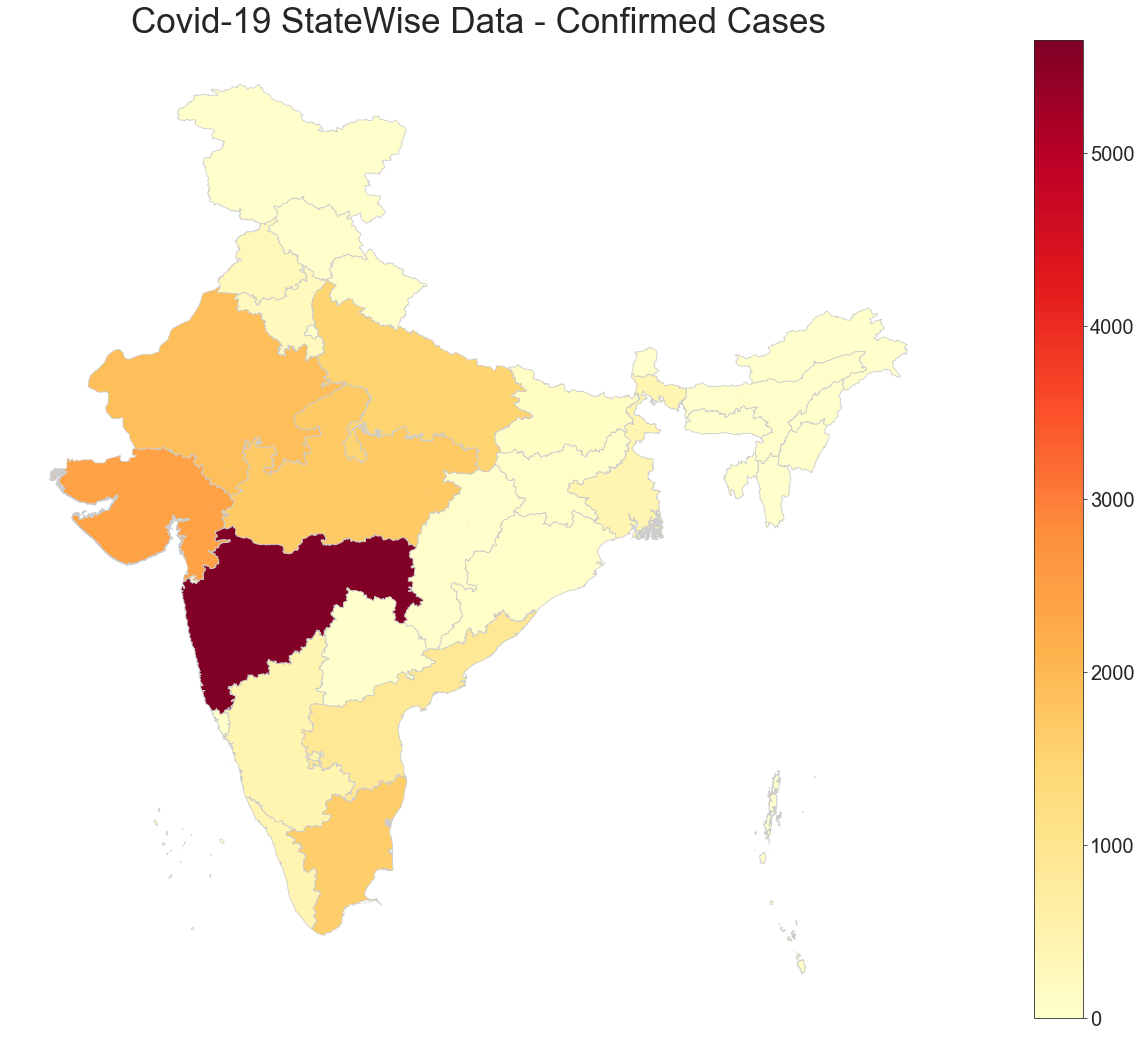

In [108]:
fig, ax = plt.subplots(1, figsize=(30, 18))
ax.axis('off')

ax.set_title('Covid-19 StateWise Data - Confirmed Cases',
            fontdict = {'fontsize': '35', 'fontweight': '3'})

merged_data.plot(
    column = 'Confirmed', 
    cmap='YlOrRd', 
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True
)
plt.show()
fig.savefig("cases-on-map.png")